**Exercise 10.11**.  The quarterly earnings per share for 1960–1980 of the U.S. company Johnson & Johnson, are saved in the file named `JJ`.

**(a)**  Plot the time series and also the logarithm of the series.  Argue that we should transform by logs to model this series.

**(b)**  The series is clearly not stationary.  Take first differences and plot that series.  Does stationarity now seem reasonable?

**(c)**  Calculate and graph the sample ACF of the first differences.  Interpret the results.

**(d)**  Display the plot of seasonal differences and the first differences.  Interpret the plot.  Recall that for quarterly data, a season is of length 4.

**(e)**  Graph and interpret the sample ACF of seasonal differences with the first differences.

**(f)**  Fit the model ARIMA$(0,1,1)\times(0,1,1)_4$, and assess the significance of the estimated coefficients.

**(g)**  Perform all of the diagnostic tests on the residuals.

**(h)**  Calculate and plot forecasts for the next two years of the series.  Be sure to include forecast limits.

**Solution**.

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_acf

In [2]:
Y = np.array(pd.read_csv('../data/JJ.dat')['JJ'])

**(a)**

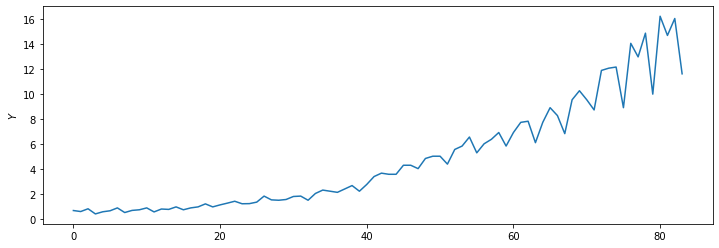

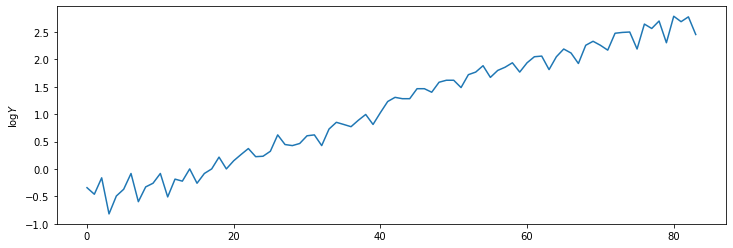

In [3]:
plt.figure(figsize=(12, 4))
plt.plot(Y)
plt.ylabel(r'$Y$')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(np.log(Y))
plt.ylabel(r'$\log Y$')
plt.show()

The seasonality change in each cycle seems to increase with the magnitude of the value -- the log transformation seems adequate.

**(b)**

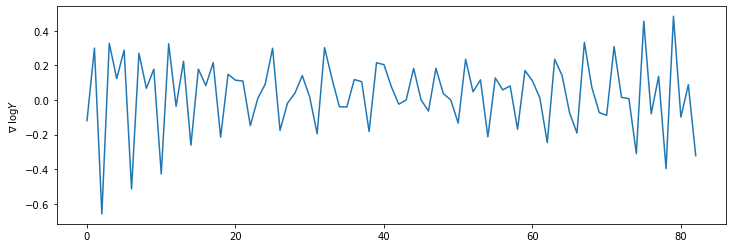

In [4]:
plt.figure(figsize=(12, 4))
plt.plot(np.diff(np.log(Y)))
plt.ylabel(r'$\nabla \; \log Y$')
plt.show()

The growth trend is gone; series may now be stationary.

**(c)**

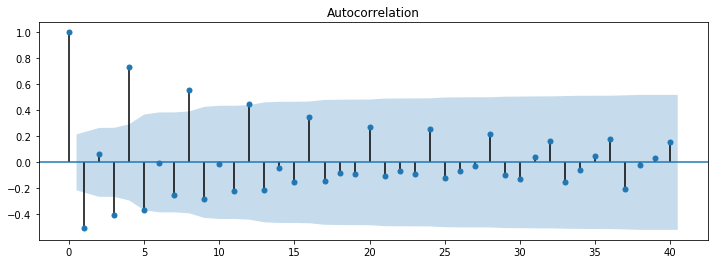

In [5]:
plt.figure(figsize=(12, 4))
plot_acf(np.diff(np.log(Y)), ax=plt.gca(), lags=40)
plt.show()

Multiple lags occcurring at every 4 periods suggest a seasonality of period 4.

**(d)**

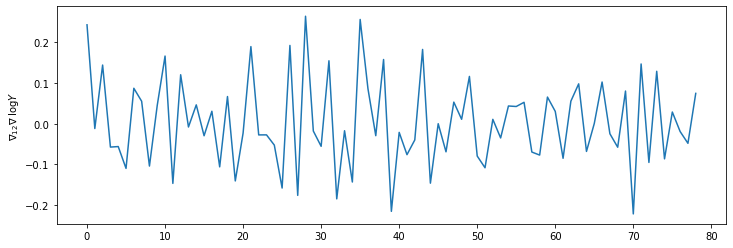

In [6]:
Z = np.diff(np.log(Y))
W = Z[4:] - Z[:-4]

plt.figure(figsize=(12, 4))
plt.plot(W)
plt.ylabel(r'$\nabla_{12} \nabla \; \log Y$')
plt.show()

Some seasonality appears now gone.

**(e)**

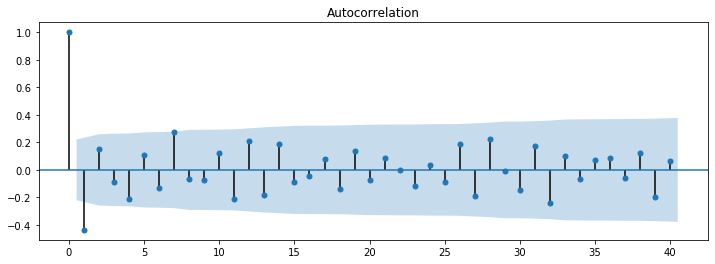

In [7]:
plt.figure(figsize=(12, 4))
plot_acf(W, ax=plt.gca(), lags=40)
plt.show()

A MA(1) model may be applicable to this series now.

**(f)**

In [8]:
model = ARIMA(np.log(Y), order=(0, 1, 1), seasonal_order=(0, 1, 1, 4)).fit()
print(model.summary())

                                    SARIMAX Results                                    
Dep. Variable:                               y   No. Observations:                   84
Model:             ARIMA(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                  78.376
Date:                         Fri, 15 May 2020   AIC                           -150.753
Time:                                 19:24:42   BIC                           -143.645
Sample:                                      0   HQIC                          -147.905
                                          - 84                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6809      0.097     -7.006      0.000      -0.871      -0.490
ma.S.L4       -0.3146      0.115     -2.743      0.006     

All coefficients are significant at $p = 0.01$.

**(g)**

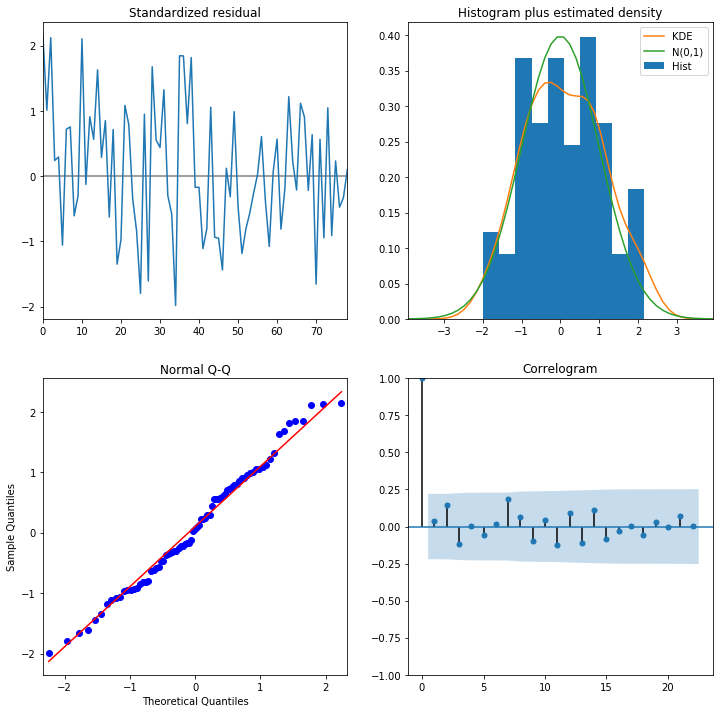

In [9]:
model.plot_diagnostics(figsize=(12, 12), lags=22)
plt.show()

**(h)**

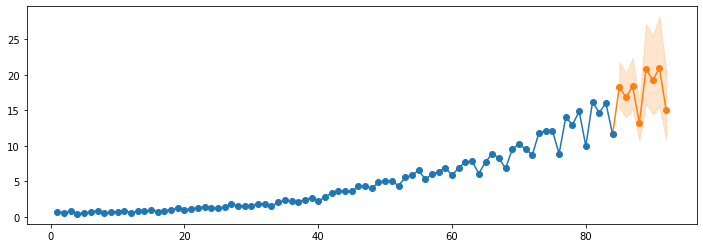

In [10]:
res = model.get_forecast(steps=8).summary_frame(alpha = 0.05)
Y_pred = res['mean']
Y_lower, Y_upper = res['mean_ci_lower'], res['mean_ci_upper']

# Prepend last element so line is continuous
plot_data = np.r_[np.log(Y[-1]), Y_pred]

n = len(Y)
m = len(Y_pred)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(n, n+m+1), np.exp(plot_data), marker='o', color='C1')
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.fill_between(np.arange(n+1, n+m+1), np.exp(Y_lower), np.exp(Y_upper), alpha=0.2, color='C1')
plt.show()

**Exercise 10.12**.  The file named `boardings` contains monthly data on the number of people who boarded transit vehicles (mostly light rail trains and city buses) in the Denver, Colorado, region for August 2000 through December 2005.

**(a)**  Produce the time series plot for these data.  Be sure to use plotting symbols that will help you assess seasonality.  Does a stationary model seem reasonable?

**(b)**  Calculate and plot the sample ACF for this series.  At which lags do you have significant autocorrelation?

**(c)**  Fit an ARMA$(0,3)\times(1,0)_{12}$ model to these data.  Assess the significance of the estimated coefficients.

**(d)**  Overfit with an ARMA$(0,4)\times(1,0)_{12}$ model.  Interpret the results.

**Solution**.

In [11]:
%%capture
%run utils.py

In [12]:
data = pd.read_csv('../data/boardings.dat', sep=' ')
data['date'] = pd.date_range('2000-08', periods=len(data), freq='M')

**(a)**

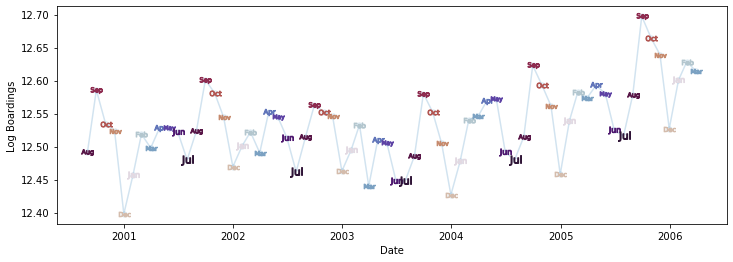

In [13]:
plot_monthly(data['date'], data['log.boardings'] , 'Date', 'Log Boardings')

Seasonality appears in this series.  Upward trend after 2004 indicates against stationarity.

**(b)**

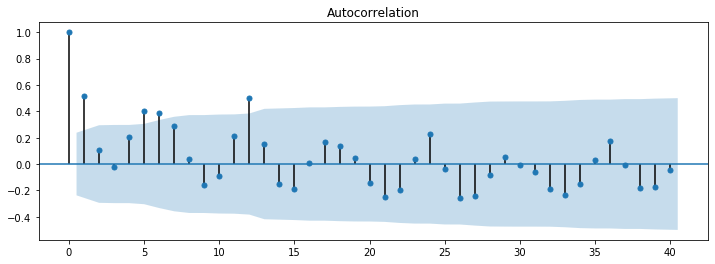

In [14]:
plt.figure(figsize=(12, 4))
plot_acf(data['log.boardings'], ax=plt.gca(), lags=40)
plt.show()

Significant autocorrelation occurs at lags 5, 6, and 12.  This suggests seasonality of period 12.

**(c)**

In [15]:
Y = data['log.boardings']
model = ARIMA(Y, order=(0, 0, 3), seasonal_order=(1, 0, 0, 12)).fit(method='innovations_mle')
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                     log.boardings   No. Observations:                   68
Model:             ARIMA(0, 0, 3)x(1, 0, [], 12)   Log Likelihood                 143.471
Date:                           Fri, 15 May 2020   AIC                           -274.941
Time:                                   19:24:47   BIC                           -261.624
Sample:                                        0   HQIC                          -269.665
                                            - 68                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5321      0.040    310.230      0.000      12.453      12.611
ma.L1          0.7300      0.157      4.649

All estimated coefficients are significant at $p = 0.05$.

**(d)**

In [16]:
model = ARIMA(Y, order=(0, 0, 4), seasonal_order=(1, 0, 0, 12)).fit(method='innovations_mle')
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                     log.boardings   No. Observations:                   68
Model:             ARIMA(0, 0, 4)x(1, 0, [], 12)   Log Likelihood                 144.173
Date:                           Fri, 15 May 2020   AIC                           -274.346
Time:                                   19:24:48   BIC                           -258.809
Sample:                                        0   HQIC                          -268.190
                                            - 68                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5326      0.048    260.664      0.000      12.438      12.627
ma.L1          0.7289      0.157      4.652

The new coefficient for $\theta_4$ is not significant.